<a href="https://colab.research.google.com/github/vkdan007/open/blob/main/lab-03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 3.  
План:
- рассмотреть некоторые полезные и ранее не использованные функции pandas и matplotlib;
- выполнить следующий шаг в анализе ранее полученных физических зависимостей.

## Перенос данных между ноутбуками  
Подходы к переносу кода рассмотрели на предыдущем занятии. Теперь обратимся к переносу данных.   
Рассмотрим numpy.save и pandas.DataFrame.to_pickle

### Подключение диска

Первым делом подключим гугл-диск к машине, на которой исполняется ваш ноутбук. Если вы не хотите это делать, то альтернативой является ручная загрузка/выгрузка файлов с такой машины (отображение содержимого директории может подтормаживать).  

На скриншоте показано, где искать и куда загружать файлы, если работаете с ними в ручную. Файлы хранятся на машине до момента "отключения от среды выполнения", поэтому дублируйте их где-нибудь еще, чтобы не потерять данные. Если работаете с подключенным гугл-диском и используете соответствующую директорию для хранения файлов, то таких проблем не будет.  

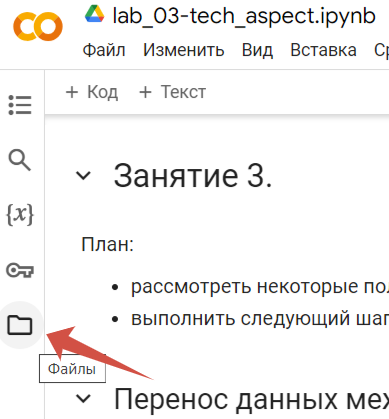

Подключение диска выполнится корректно, только если выдать **все** запрашиваемые права доступа. Запрос происходит после исполнения ячейки кода ниже

In [193]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Теперь в интерфейсе "Файлы" (см. скриншот выше) доступна директория drive/MyDrive c содержимым вашего диска. Будем работать в уже выделенной для ноутбуков директории - "/content/drive/MyDrive/Colab Notebooks". Скопировать путь к ней можно в выпадающем списке по нажатию на три точки (см. скриншот). Если дерево файлов не отображается, надо подождать :)  
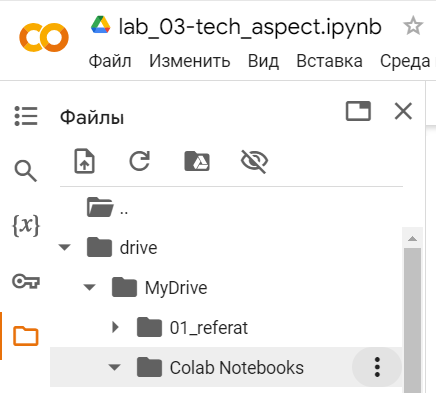

### Выгрузка/загрузка данных

Сейчас мы будем формировать файл данных в старом ноутбуке, а открывать его в новом. Для этого необходимо открыть ноутбуки двух прошлых занятий и повторить манипуляции с подключением диска. Либо в прошлых ноутбуках просто воспользоваться веб-интерфейсом, чтобы выкачать сформированный файл и затем загрузить его на гугл-диск.

1. Откройте файл ЛР01 и выполните все ячейки (Меню вверху страницы: Среда выполнения -> Выполнить все).  
2. В конце ноутбука создайте ячейку с кодом и сохраните массив значений числа протонов/нейтронов, используемый для графика, в файл:  
`np.save('Np_vs_Nn.npy', ps_ns)`.  
3. Скачайте полученный файл, например, через интерфейс (Файлы -> три точки напротив файла Np_vs_Nn.npy -> Скачать).


1. Откройте файл ЛР02 и выполните все ячейки (Меню вверху страницы: Среда выполнения -> Выполнить все).  
2. В конце ноутбука создайте ячейку с кодом и сохраните датафрейм, используемый для графика, в файл:  
`isotopes.to_pickle('isotope_params.pkl')`.  
3. Обновите отображение вкладки "Файлы" (круглая стрелочка вверху) и скачайте полученный файл.

Загрузите файлы на гугл-диск.


In [194]:
# проверяем файлы на диске
!ls -la "/content/drive/MyDrive"

total 21345
drwx------ 2 root root     4096 Sep 17 11:46 'Colab Notebooks'
-rw------- 1 root root 11675650 Oct 17 19:40  isotope_params.pkl
-rw------- 1 root root     6816 Oct 17 19:55  Np_vs_Nn.npy
-rw------- 1 root root  7801881 Jun 10  2019  video.mp4
-rw------- 1 root root      180 Sep  8  2022 'Б-22-501 таблица матанализ.gsheet'
-rw------- 1 root root    16072 Jan 31  2023 'Б-22-501 таблица матанализ.xlsx'
-rw------- 1 root root  2254405 Jun 15  2019  Видеозапись
-rw------- 1 root root      180 Dec 25  2022 'Копия MEPhI DAP Programming, part 1, 2022 (1).gsheet'
-rw------- 1 root root      180 Dec 26  2022 'Копия MEPhI DAP Programming, part 1, 2022.gsheet'
-rw------- 1 root root      180 Apr 28  2023 'Копия MEPhI DAP Programming, part 2, 2022-2023 (1).gsheet'
-rw------- 1 root root      180 Apr 14  2023 'Копия MEPhI DAP Programming, part 2, 2022-2023 (2).gsheet'
-rw------- 1 root root      180 Apr  9  2023 'Копия MEPhI DAP Programming, part 2, 2022-2023 (3).gsheet'
-rw------- 1 roo

#### Загрузка данных в numpy-массив и датафрейм

In [195]:
import numpy as np
import pandas as pd

In [196]:
!pip3 install mendeleev

In [197]:
np_vs_nn = np.load(f"/content/drive/MyDrive/Np_vs_Nn.npy")
isotopes = pd.read_pickle(f"/content/drive/MyDrive/isotope_params.pkl")

Вопрос: файлы каких форматов еще поддерживает pandas?
Найдите в документации pandas функции, начинающиеся на `read_`.  Выпишите их в ячейку ниже ненумерованным списком

In [198]:
for method in pd.__all__:
  if method.startswith("read_"):
    print(f"{method}")

read_clipboard
read_csv
read_excel
read_feather
read_fwf
read_gbq
read_hdf
read_html
read_json
read_orc
read_parquet
read_pickle
read_sas
read_spss
read_sql
read_sql_query
read_sql_table
read_stata
read_table
read_xml


Проверим, что получилось

In [199]:
np_vs_nn.shape

(2, 418)

In [200]:
isotopes.sample(3)

,Iso,Z,A,N,mass,del_m,Ecv,Eud
3051,"atomic_number= 90, mass_number= 219, mass=2...",90,219,129,219.015526,2.920818e-27,1640.728287,7.491910
388,"atomic_number= 20, mass_number= 57, mass=5...",20,57,37,56.992958,7.864932e-28,441.801423,7.750902
1897,"atomic_number= 61, mass_number= 150, mass=1...",61,150,89,149.920990,2.150896e-27,1208.235367,8.054902


In [201]:
# На прошлом занятии мною была допущена ошибка в формировании имен колонок.
# Объясню в следующий раз, но исправим это сейчас.
isotopes.columns

Index(['Iso', 'Z', 'A', 'N', 'mass', 'del_m', 'Ecv', 'Eud'], dtype='object')

In [202]:
# если код ячейки выше возвращает тип данных MuliIndex, а не Index, то выполните код из этой ячейки
#У меня все ок
"""
columns = [col[0] for col in isotopes.columns]
isotopes.columns = columns
isotopes.columns # должен получиться тип - Index
"""

'\ncolumns = [col[0] for col in isotopes.columns]\nisotopes.columns = columns\nisotopes.columns # должен получиться тип - Index\n'

In [203]:
# заменим файл с датафреймом
#isotopes.to_pickle("/content/drive/MyDrive/Colab Notebooks/mmphp_data/isotope_params.pkl")

## Индексация датафрейма по условию, или почему массы атомов в а.е.м. не целые
Технический аспект исследования к вопросу о дробных значениях массы атомов в атомных единицах массы.  

$1\ а.е.м. = \dfrac{1}{12}m(^{12}_6C)$

Индексация датафрейма по условию с использованием метода `.loc`

In [204]:
print('Изотопы углерода')
isotopes.loc[(isotopes['Z'] == 6)]

Изотопы углерода


,Iso,Z,A,N,mass,del_m,Ecv,Eud
54,"atomic_number= 6, mass_number= 8, mass=8...",6,8,2,8.037643,3.889373e-29,21.848003,2.731000
55,"atomic_number= 6, mass_number= 9, mass=9...",6,9,3,9.031037,6.426273e-29,36.098675,4.010964
56,"atomic_number= 6, mass_number= 10, mass=1...",6,10,4,10.016853,1.022152e-28,57.417957,5.741796
57,"atomic_number= 6, mass_number= 11, mass=1...",6,11,5,11.011433,1.256162e-28,70.563103,6.414828
58,"atomic_number= 6, mass_number= 12, mass=1...",6,12,6,12.000000,1.590000e-28,89.315995,7.443000
59,"atomic_number= 6, mass_number= 13, mass=1...",6,13,7,13.003355,1.678293e-28,94.275727,7.251979
60,"atomic_number= 6, mass_number= 14, mass=1...",6,14,8,14.003242,1.824167e-28,102.469982,7.319284
61,"atomic_number= 6, mass_number= 15, mass=1...",6,15,9,15.010599,1.845999e-28,103.696395,6.913093
62,"atomic_number= 6, mass_number= 16, mass=1...",6,16,10,16.014701,1.921886e-28,107.959201,6.747450
63,"atomic_number= 6, mass_number= 17, mass=1...",6,17,11,17.022579,1.935082e-28,108.700460,6.394145


In [205]:
print('Изотоп углерода с массовым числом, равной 12')
isotopes.loc[(isotopes["Z"] == 6) & (isotopes['A'] == 12)]

Изотоп углерода с массовым числом, равной 12


,Iso,Z,A,N,mass,del_m,Ecv,Eud
58,"atomic_number= 6, mass_number= 12, mass=1...",6,12,6,12.0,1.590000e-28,89.315995,7.443


In [206]:
print('Масса С-12 в а.е.м.: ', isotopes.loc[(isotopes["Z"] == 6) & (isotopes['A'] == 12)]["mass"].values[0])

Масса С-12 в а.е.м.:  12.0


Ответ на вопрос в отношении других атомов кроется как раз в ранее построенном графике удельной энергии связи: масса, приходящаяся на 1 нуклон, зависит от конфигурации атома. Отсюда и появляются дробные значения

In [207]:
from matplotlib import pyplot as plt

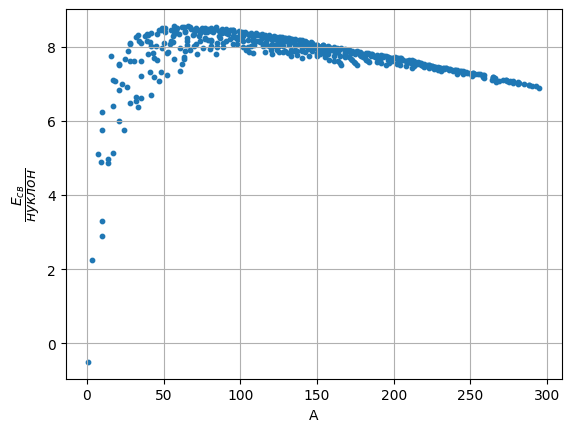

In [208]:
# экспресс способ построения графика - plt.plot/plt.scatter
plt.scatter(isotopes['A'][::7], isotopes['Eud'][::7], s=10)
plt.xlabel('A') # ~ ax.set_xlabel
plt.ylabel(r'$\dfrac{E_{св}}{нуклон}$')
plt.grid()

## Визуализация в pandas

Выпишите на русском языке нумерованным списком типы диаграмм, поддерживаемые методом `DataFrame.plot`

- линия (line)
- столбчатая (bar)
- горизонтальная столбчатая (barh)
- гистограмма (hist)
- ящик с усами (box)
- оценка плотности (kde)
- плотность (density)
- площадь (area)
- круговая (pie)
- точечная (scatter)
- шестиугольная (hexbin)

Постройте диаграмму box-and-whisker (ящик с усами) методом `Series.plot`. Прокомментируйте ее характер

<Axes: >

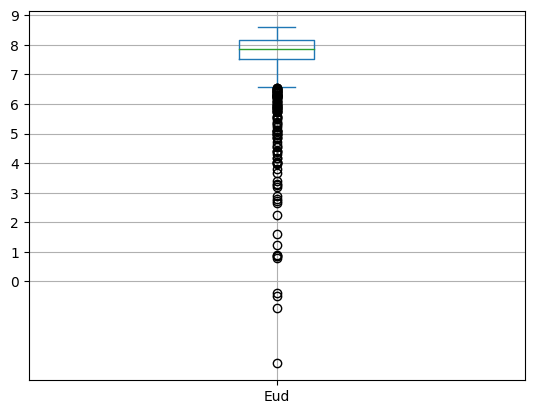

In [209]:
isotopes["Eud"].plot(kind="box", grid=True, yticks=[i for i in range(10)])

Медианное значение примерно равно 7.9;
25ый квартиль находится в районе 7.5, а 75ый квартиль в районе 8.1,
следовательно основная часть значений находится в промежутке от 7.5 до 8.1

Есть методы и с более контролируемыми параметрами. Например, следующий для гистограмм:

Text(0.5, 0, '$E_{св}/нуклон$')

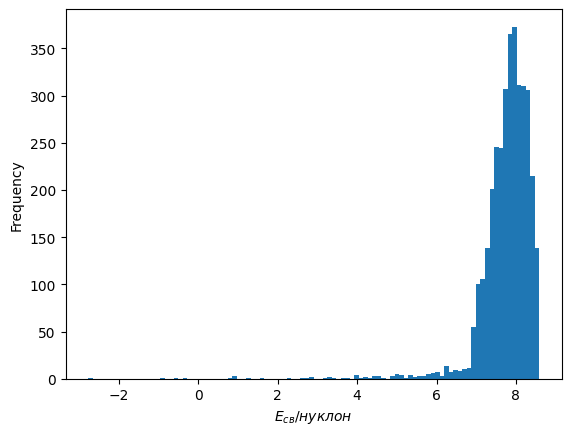

In [210]:
# гистограмма значений
isotopes['Eud'].plot.hist(bins=100)
plt.xlabel(r'$E_{св}/нуклон$')

## Место изотопов урана на ранее построенных графиках

### Ранее не изученные детали библиотеки matplotlib  

1. Построение нескольких подграфиков (subplots)

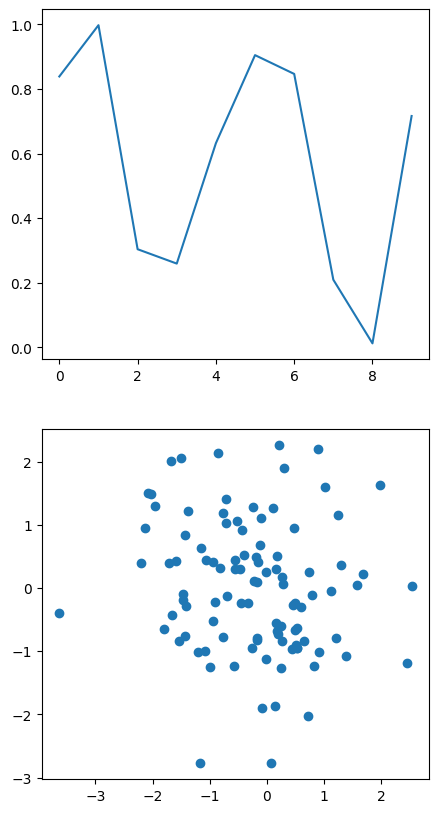

In [211]:
fig, ax = plt.subplots(nrows=2, figsize=(5, 10))
ax[0].plot(np.random.uniform(0, 1, 10))
ax[1].scatter(np.random.normal(size=100), np.random.normal(size=100))

2. Возврат/установка граничных значений осей
3. Обозначения на графике (легенда)

In [212]:
ax[1].get_xlim(), ax[1].get_ylim()

((-3.940950102776047, 2.843272525244205),
 (-3.0251374698115816, 2.512333664644188))

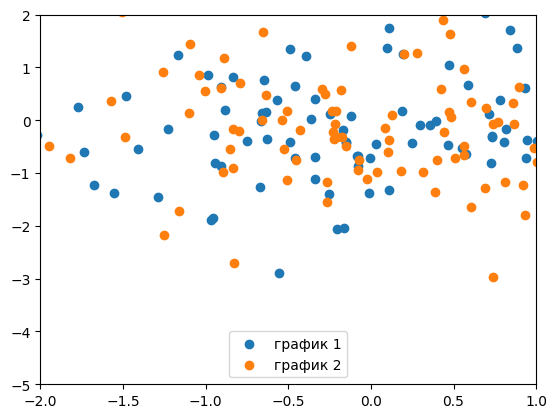

In [213]:
fig, ax = plt.subplots()
ax.scatter(np.random.normal(size=100), np.random.normal(size=100), label='график 1')
ax.scatter(np.random.normal(size=100), np.random.normal(size=100), label='график 2')

ax.set_xlim(-2, 1)
ax.set_ylim(-5, 2)

ax.legend(loc='lower center')

## Задание для самостоятельного выполнения  
Дополнить графики зависимости числа нейтронов от числа протонов (ЛР01) и удельной энергии связи от массового числа (ЛР02) значениями для изотопов урана.

Недостающую информацию по изотопам урана необходимо взять из библиотеки mendeleev. Отберите данные только для природных изотопов (`abundance is not None`)

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
print("\nСтолбцы isotopes:")
print(isotopes.columns)


Столбцы isotopes:
Index(['Iso', 'Z', 'A', 'N', 'mass', 'del_m', 'Ecv', 'Eud'], dtype='object')


In [216]:
isotopes
#isotopes.loc[isotopes["protons"]==92]["Iso"]
##isotopes.loc[(isotopes["protons"]==92) & (isotopes["Iso"].abudance not None)]
isotopes["abundance"] = isotopes["Iso"].apply(func=lambda x: True if x.abundance is not None else False)
isotopes.sample(5)

,Iso,Z,A,N,mass,del_m,Ecv,Eud,abundance
3268,"atomic_number= 98, mass_number= 248, mass=2...",98,248,150,248.072183,3.225940e-27,1812.126201,7.306960,False
2789,"atomic_number= 83, mass_number= 199, mass=1...",83,199,116,198.977673,2.711774e-27,1523.300722,7.654777,False
2532,"atomic_number= 77, mass_number= 184, mass=1...",77,184,107,183.957476,2.543111e-27,1428.556592,7.763895,False
2100,"atomic_number= 66, mass_number= 163, mass=1...",66,163,97,162.928737,2.313732e-27,1299.706047,7.973657,True
3379,"atomic_number= 104, mass_number= 263, mass=2...",104,263,159,263.112461,3.361259e-27,1888.139294,7.179237,False


In [217]:
import mendeleev
uranus = mendeleev.element("U")
uranus.isotopes
pass

In [218]:
uranium_nn = isotopes.loc[(isotopes["Z"]==92) & (isotopes["abundance"])]["N"]
uranium_np = isotopes.loc[(isotopes["Z"]==92) & (isotopes["abundance"])]["Z"]
uranium_en_binding = isotopes.loc[(isotopes["Z"]==92) & (isotopes["abundance"])]
uranium_nn + uranium_np


,0
3122,234
3123,235
3126,238


Отрисуйте оба графика рядом (в одну **строку**, а не колонку), используя метод `subplots`.  
Подпишите оси, добавьте легенды.  
График N(p) vs. N(n) в легенде подпишите как "Стабильные изотопы", а график энергии связи - "Изотопы".

Text(0.5, 1.0, 'Изотопы')

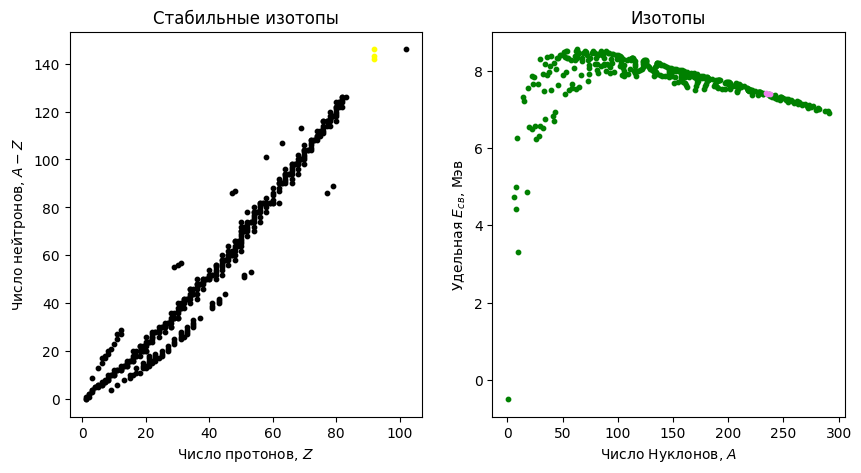

In [224]:
ig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10, 5))
axs[0].scatter(np_vs_nn[0], np_vs_nn[1], s=10, c="black")
axs[0].scatter(uranium_np, uranium_nn, s=10, c="yellow")
axs[0].set_xlabel('Число протонов, $Z$')
axs[0].set_ylabel('Число нейтронов, $A-Z$')
axs[0].set_title('Стабильные изотопы')


axs[1].scatter(x=isotopes["A"][::10],
                y=isotopes["Eud"][::10],
                s=10,
                c='green'
                )
axs[1].scatter(x=uranium_np + uranium_nn,
                y=uranium_en_binding["Eud"],
                s=10,
                c='violet'
                )
axs[1].set_xlabel('Число Нуклонов, $A$')
axs[1].set_ylabel('Удельная $E_{св}$, Мэв')
axs[1].set_title('Изотопы')

In [225]:
def config_plot_coords(ax, step=(10,10)):

  xlims, ylims = ax.get_xlim(), ax.get_ylim()
  ax.set_xticks(np.arange(0, xlims[1], step[0]), minor=True)
  ax.set_yticks(np.arange(0, ylims[1], step[1]), minor=True)
  ax.grid(which='both')

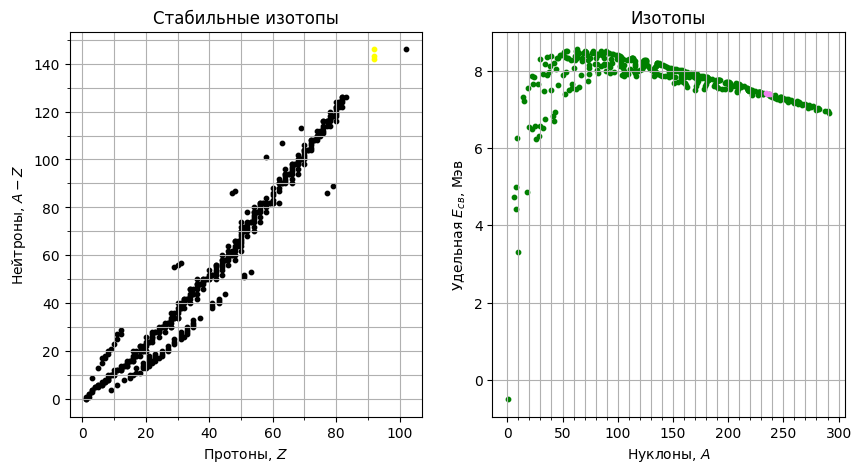

In [226]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10, 5))

axs[0].scatter(np_vs_nn[0], np_vs_nn[1], s=10, c="black")
axs[0].scatter(uranium_np, uranium_nn, s=10, c="yellow")
axs[0].set_xlabel('Протоны, $Z$')
axs[0].set_ylabel('Нейтроны, $A-Z$')
axs[0].set_title('Стабильные изотопы')
config_plot_coords(axs[0])

axs[1].scatter(x=isotopes["A"][::10],
                y=isotopes["Eud"][::10],
                s=10,
                c='green'
                )
axs[1].scatter(x=uranium_np + uranium_nn,
                y=uranium_en_binding["Eud"],
                s=10,
                c='violet'
                )
axs[1].set_xlabel('Нуклоны, $A$')
axs[1].set_ylabel('Удельная $E_{св}$, Мэв')
axs[1].set_title('Изотопы')
config_plot_coords(axs[1])

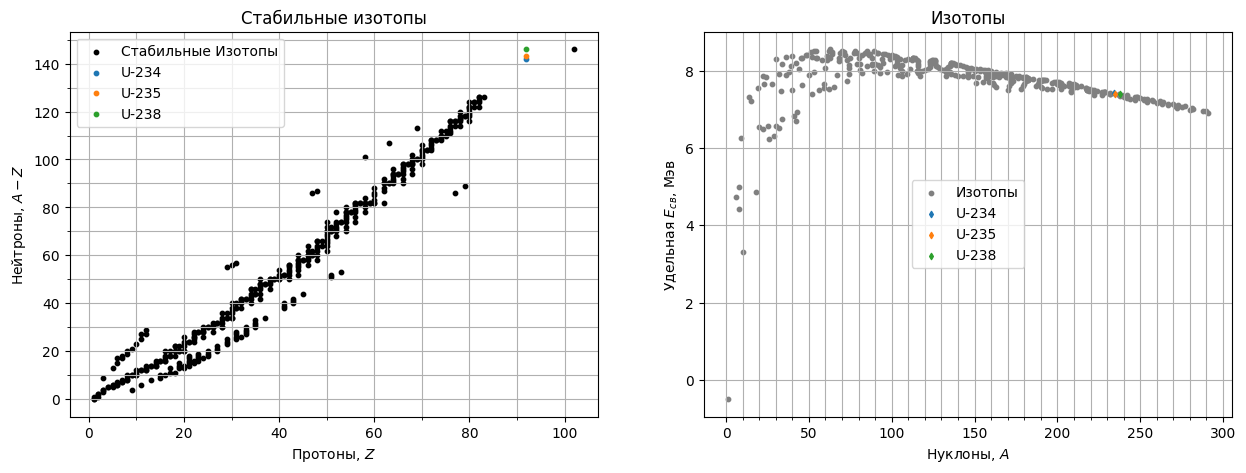

In [228]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))

axs[0].scatter(np_vs_nn[0], np_vs_nn[1], s=10, c="black", label="Стабильные Изотопы")
axs[0].set_xlabel('Протоны, $Z$')
axs[0].set_ylabel('Нейтроны, $A-Z$')
axs[0].set_title('Стабильные изотопы')
config_plot_coords(axs[0])
for p,n in zip(uranium_np, uranium_nn):
  axs[0].scatter([p], [n], label = f'U-{int(p+n)}', s=10)

axs[0].legend(loc='upper left')

axs[1].scatter(x=isotopes["A"][::10],
                y=isotopes["Eud"][::10],
                s=10,
                c='gray',
               label="Изотопы"
                )

axs[1].set_xlabel('Нуклоны, $A$')
axs[1].set_ylabel('Удельная $E_{св}$, Мэв')
axs[1].set_title('Изотопы')
config_plot_coords(axs[1])

for i, data in uranium_en_binding[['A', 'Eud']].iterrows():
  axs[1].scatter(data['A'], data['Eud'], label = f'U-{data["A"].astype(int)}', s=10, marker='d')
axs[1].legend(loc='center')